# Testing Redshift Tomographic Bins

In [1]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
import scripts.plotting as p
import matplotlib.pyplot as plt
from scripts.nz_metrics import NZMetrics
from scripts.presets import Presets
from scripts.tomographic_binning import TomographicBinning

I am using pyccl version 2.8.0


In [2]:
# This analysis will be done for a cosmology with the following parameters
# if you want to change the cosmology, you can do it here or just run without it.
# For now, we will keep it as is.
#cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

# The class has default values for the maximal redshift and the resolution of redshifts.
# You can change them if you want to or run the default values.
# Since we are investigating the impact of the resolution of redshifts,
# we will keep the maximal redshift as is (for now) and only change the redshift resolution.
redshift_max = 3.5
redshift_resolution_1 = 300  # this is the first resolution of redshifts
redshift_resolution_2 = 5000  # this is the second resolution of redshifts
forecast_year = "1"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution_1,
                  forecast_year=forecast_year)
redshift_range = presets.redshift_range
bin = TomographicBinning(presets)
source_bins = bin.source_bins()
lens_bins = bin.lens_bins()
source_bin_centers = bin.source_bin_centers()
lens_bin_centers = bin.lens_bin_centers()

nzm = NZMetrics(presets)


Data saved to data_output/redshift_distributions/source_bins_y1.npy
Data saved to data_output/redshift_distributions/lens_bins_y1.npy


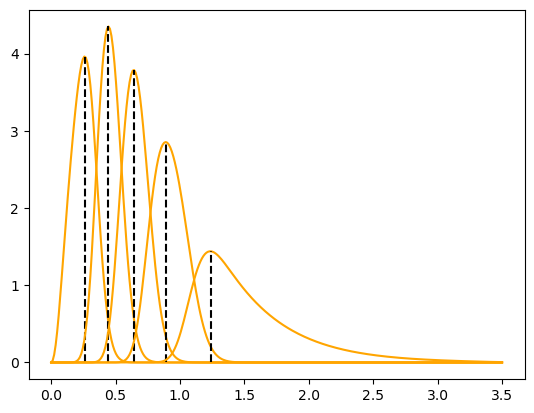

In [3]:
for i in source_bins.keys():
    plt.plot(redshift_range, source_bins[i], c="orange")
    plt.vlines(x=source_bin_centers[i], ymin=0, ymax=np.max(source_bins[i]), color='k', linestyle='--')


(0.0, 1.5)

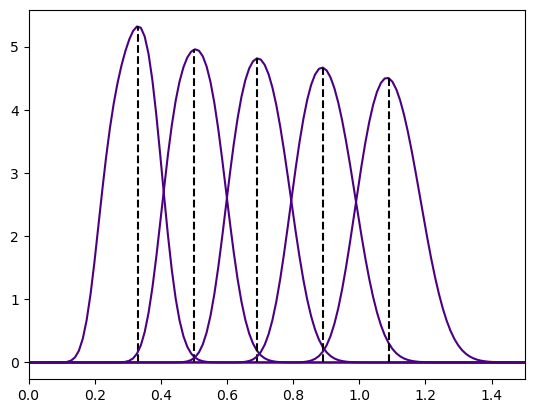

In [4]:
for i in lens_bins.keys():
    plt.plot(redshift_range, lens_bins[i], c="indigo")
    plt.vlines(x=lens_bin_centers[i], ymin=0, ymax=np.max(lens_bins[i]), color='k', linestyle='--')
plt.xlim(0, 1.5)

In [5]:
%%time
bin_centers_comparison = nzm.compare_bin_centers_over_resolutions()

CPU times: user 1.9 s, sys: 36.5 ms, total: 1.94 s
Wall time: 1.98 s


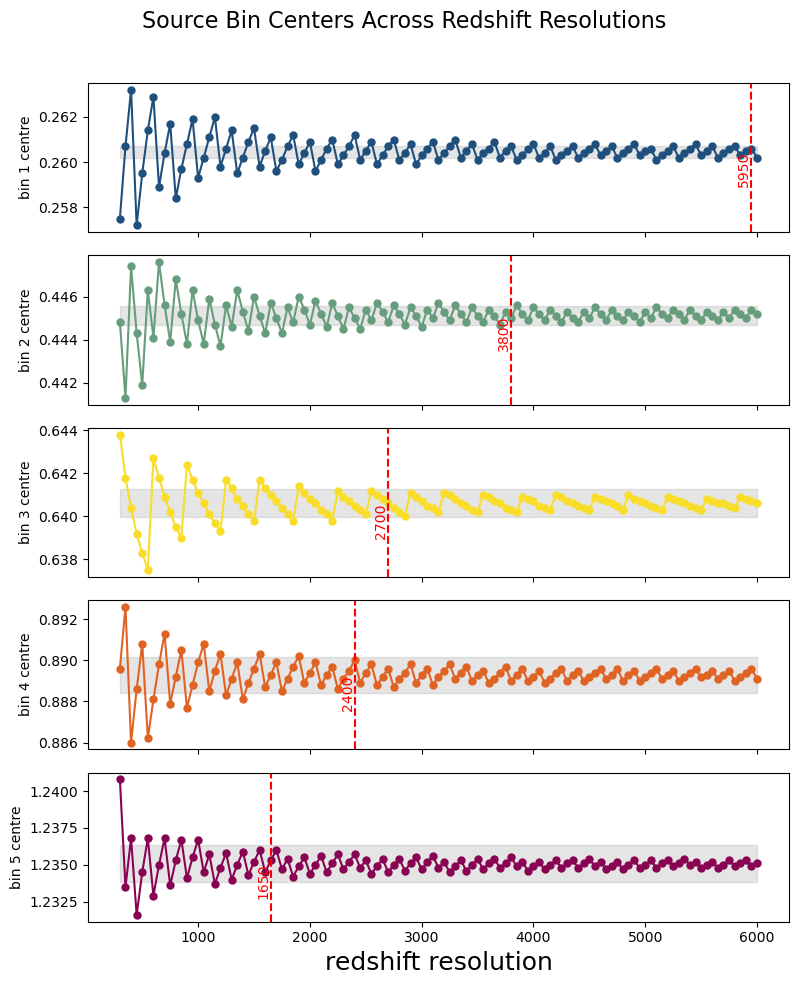

In [6]:
p.plot_bin_centers_subplots(bin_centers_comparison,
                            zmax=redshift_max,
                            forecast_year=forecast_year,
                            bin_type="source",
                            percentage=0.1)

In [ ]:
p.plot_bin_centers_subplots(bin_centers_comparison,
                            zmax=redshift_max,
                            forecast_year=forecast_year,
                            bin_type="lens",
                            percentage=0.1)

In [ ]:
percs = (0.005, 0.01, 0.05, 0.1, 0.5, 1,)
p.plot_stabilization_vs_percentage(bin_centers_comparison, bin_type="source", percentages=percs, stability_steps=5)

In [ ]:
percs = (0.005, 0.01, 0.05, 0.1, 0.5, 1,)
plot.plot_stabilization_vs_percentage(bin_centers_comparison, bin_type="lens", percentages=percs, stability_steps=5)